In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import numpy as np  
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#from google.colab import drive
#drive.mount('/gdrive')

## 1.Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [9]:
rating_df = pd.read_csv("ratings_Electronics.csv", header=None)

In [10]:
rating_df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [11]:
rating_df.shape

(7824482, 4)

In [12]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
0    object
1    object
2    float64
3    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [13]:
rating_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
3,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [14]:
rating_df.columns = ["user_id","product_id","rating","timestamp"]

In [15]:
rating_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [16]:
rating_df.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [17]:
rating_df.isna().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [18]:
rating_df.drop(columns = "timestamp",inplace =True,axis =1)

In [19]:
rating_df["rating"].unique()

array([5., 1., 3., 2., 4.])

In [20]:
users_df = rating_df.groupby(['user_id']).count()

In [21]:
users_df.reset_index(inplace = True)

## 2.Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [22]:
(users_df.rating > 50).count()

4201696

In [23]:
users_df_50= users_df.loc[users_df["rating"]>=50]

In [24]:
users_df_50.head()

,user_id,product_id,rating
5506,A100UD67AHFODS,116,116
5558,A100WO06OQR8BQ,132,132
9928,A105S56ODHGJEK,68,68
9965,A105TOJ6LTVMBG,71,71
13836,A10AFVU66A79Y1,65,65


In [25]:
final_df = pd.merge(rating_df, users_df_50, on='user_id', how='inner')

In [26]:
final_df.head()

,user_id,product_id_x,rating_x,product_id_y,rating_y
0,A3BY5KCNQZXV5U,0594451647,5.0,50,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50,50


In [27]:
final_df.drop(columns = ["product_id_y","rating_y"],axis =1,inplace =True)

In [28]:
final_df.head()

,user_id,product_id_x,rating_x
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [29]:
final_df.columns = ['user_id', 'product_id', 'rating']

In [30]:
final_df.head()

,user_id,product_id,rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [31]:
final_df.rating = final_df.rating.astype('int64') 

In [32]:
final_df.head()

,user_id,product_id,rating
0,A3BY5KCNQZXV5U,0594451647,5
1,A3BY5KCNQZXV5U,B00000JD4V,4
2,A3BY5KCNQZXV5U,B000063574,5
3,A3BY5KCNQZXV5U,B0000CDJP8,5
4,A3BY5KCNQZXV5U,B0007Y794O,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD0E6470F0>]],
      dtype=object)

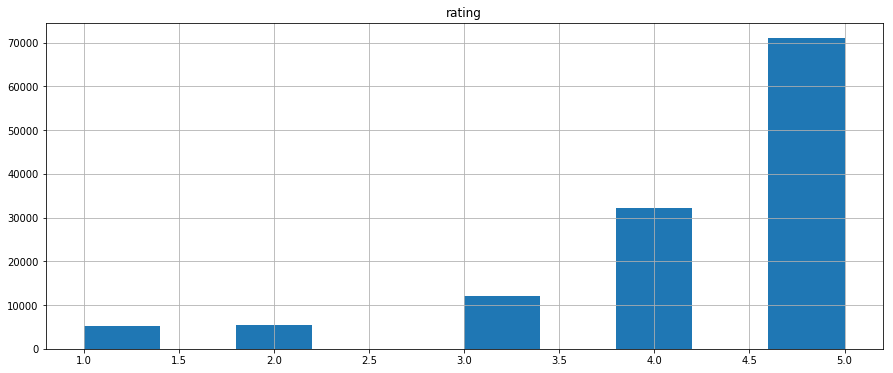

In [33]:
final_df.hist(column="rating",grid = True,figsize = (15,6))
plt.show()

## 3.Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [34]:
X_train, X_test = train_test_split(final_df, test_size = 0.3, random_state = 1)

In [35]:
X_train.shape
X_test.shape

(88109, 3)

(37762, 3)

## 4.Build Popularity Recommender model.

### Top 5 Products based on the ratings of all data available.

In [36]:
final_df.groupby(by='product_id')['rating'].mean().sort_values(ascending=False).head(5)

product_id
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64

### Trying to make a prediction based on Popularity

In [37]:
train_rated = X_train.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [38]:
test_rated = X_test.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [39]:
train_rated = train_rated.reset_index(name = 'rating')
test_rated = test_rated.reset_index(name = 'rating')

In [40]:
rated_products = pd.merge(test_rated, train_rated, on='product_id', how='inner')

In [41]:
rated_products.head()

,product_id,rating_x,rating_y
0,B002SW3MP8,5.0,3.000000
1,B002SQKVE4,5.0,5.000000
2,B002SQKL7Q,5.0,4.818182
3,B002SQ9ZX2,5.0,5.000000
4,B002SP2X5U,5.0,2.000000


In [42]:
final_df.product_id.sample()

55815    B002DW99H8
Name: product_id, dtype: object

In [43]:
test_rated[test_rated["product_id"] == "B002DW99H8"]

,product_id,rating
11036,B002DW99H8,4.571429


In [44]:
train_rated[train_rated["product_id"] == "B002DW99H8"]

,product_id,rating
21109,B002DW99H8,4.444444


### RMSE Value of a Popularity Based Model

In [45]:
print("RMSE value",np.sqrt(mean_squared_error(rated_products["rating_y"],rated_products["rating_x"])))

RMSE value 1.0987517295955944


## 5.Build Collaborative Filtering model.

In [46]:
!pip install surprise

In [47]:
final_df.shape

(125871, 3)

In [48]:
final_df.user_id=final_df.user_id.astype(str)
final_df.product_id=final_df.product_id.astype(str)

In [49]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

### Converting Pandas Dataframe to Surpise format

In [50]:
data = Dataset.load_from_df(final_df[['user_id', 'product_id', 'rating']], reader)

In [51]:
from surprise.model_selection import train_test_split
train, test = train_test_split(data, test_size=.30,random_state=123)

In [52]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [53]:
print('No of unique users:',len(final_df["user_id"].unique()))

No of unique users: 1540


In [54]:
print('No of unique products:',len(final_df["product_id"].unique()))

No of unique products: 48190


### Since the no of unique users are lesser than the unique produsct, it is better to build to Used Based Collaborative Filter

## 6.Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

### Grid Search Model

In [55]:
param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [True]}
             }

In [56]:
from surprise.model_selection import GridSearchCV

In [57]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

### Model building using best params from Grid Search model

In [58]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
model.fit(train)

Computing the pearson similarity matrix...
Done computing similarity matrix.


### Prediction

In [59]:
test_predict = model.test(test)

### RMSE Score

In [60]:
accuracy.rmse(test_predict)

RMSE: 1.0473


1.0472963586706814

In [61]:
test_predict

[Prediction(uid='A22CW0ZHY3NJH8', iid='B005FDXZJU', r_ui=5.0, est=4.720331496101592, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A7FDGFK0KN7QG', iid='B005058B6A', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AMZCZBK1EF1PV', iid='B002C73WR2', r_ui=5.0, est=4.261051651931131, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A213J54E63SYOP', iid='B007JPOX8O', r_ui=4.0, est=3.838709677419355, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1H7Y5XKPGT0OS', iid='B005X64MN2', r_ui=5.0, est=4.15, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2X3L31KCXBHCL', iid='B00EOI2SYK', r_ui=5.0, est=4.298245614035087, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A34C9AFFZOI45T', iid='B003QA5LA0', r_ui=1.0, est=4.8352941176470585, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3D1TZH619NKHN', iid

In [62]:
predictions = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_predict])

In [63]:
predictions.head()

,0,1,2
0,A22CW0ZHY3NJH8,B005FDXZJU,4.720331
1,A7FDGFK0KN7QG,B005058B6A,4.666667
2,AMZCZBK1EF1PV,B002C73WR2,4.261052
3,A213J54E63SYOP,B007JPOX8O,3.838710
4,A1H7Y5XKPGT0OS,B005X64MN2,4.150000


In [64]:
predictions.columns = ["user_id","product_id","est_rating"]

In [65]:
predictions.sort_values(by = ["user_id","est_rating",],ascending=False,inplace=True)

## 7.Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.


In [66]:
def top_five(user_id):
  return predictions[predictions["user_id"]==user_id].head(5)

In [67]:
final_df.user_id.sample()

72355    A34CKIMZ969UW7
Name: user_id, dtype: object

In [68]:
top_five('A34CKIMZ969UW7')

,user_id,product_id,est_rating
5576,A34CKIMZ969UW7,B00009R8D5,4.261052
12151,A34CKIMZ969UW7,B003EDFXRU,4.261052
27132,A34CKIMZ969UW7,B009FNAJ1I,4.261052
27631,A34CKIMZ969UW7,B004OHJ1M8,4.261052
33722,A34CKIMZ969UW7,B002MVQTDM,4.261052


### Top 5 Recommendations for all users

In [69]:
top_5_recos = predictions.groupby("user_id").head(5).reset_index(drop=True)

In [70]:
top_5_recos

,user_id,product_id,est_rating
0,AZOK5STV85FBJ,B006MPRFJQ,4.756757
1,AZOK5STV85FBJ,B000O5N5AI,4.756757
2,AZOK5STV85FBJ,B00003006E,4.756757
3,AZOK5STV85FBJ,B0088LXTTM,4.756757
4,AZOK5STV85FBJ,B00B25P27S,4.756757
5,AZNUHQSHZHSUE,B000N99BBC,4.500345
6,AZNUHQSHZHSUE,B000FJEYZI,4.261052
7,AZNUHQSHZHSUE,B000X27U44,4.261052
8,AZNUHQSHZHSUE,B009M3PP7O,4.261052
9,AZNUHQSHZHSUE,B0032HI3HU,4.261052
